In [36]:
import primesieve
import numpy as np

hash function:  
$$ h(x) = c(x) + \sum_{z \in \Gamma(x)} log(\mathscr P(c(z))) $$

$c(x)$ is the color  
$\mathscr P$ is the nth prime number  
$\Gamma(x)$ are the neighbors of x  

## Palette WL hash function

$$ h(x) = c(x) + \frac{1}{\lceil \Sigma_{ z' \in V_k} log(\mathscr P(c(z'))) \rceil} . \sum_{z \in \Gamma(x)} log(\mathscr P (c(z)))   $$

$\lceil . \rceil$ is the ceiling operation witch gives the smallest integer greater than the input.

The first part is the hash of the nodes in the subgraph.This way, the hash is normalized by the max number from the subgraph.

In [7]:
import matplotlib.pyplot as plt

In [2]:
import networkx as nx
g = nx.barabasi_albert_graph(10,5)


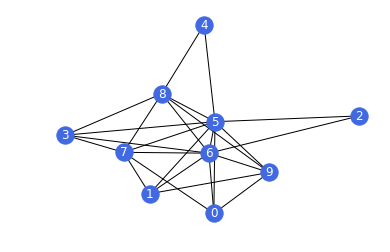

In [24]:
nx.draw_networkx(g, node_color='royalblue', font_color='w')
plt.axis('off')
plt.show()

In [3]:
def sub_graph(g,e,k=10):
    # select nodes
    x,y = e
    # list of K nodes
    Vk = [x,y]
    while len(Vk)<k:
        x_nbg = list(nx.neighbors(g,x))
        y_nbg = list(nx.neighbors(g,y))
        Vk.extend(x_nbg)
        Vk.extend(y_nbg)
    if k < len(Vk):
        Vk_cropped = Vk[:k+2]
        G = nx.Graph(nx.subgraph(g, Vk_cropped))
    return G

In [4]:
g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [10]:
g.edges()

EdgeView([(0, 9), (0, 5), (0, 6), (0, 7), (1, 9), (1, 5), (1, 6), (1, 7), (2, 5), (2, 6), (3, 8), (3, 5), (3, 6), (3, 7), (4, 8), (4, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (8, 9)])

In [11]:
G = sub_graph(g, (0,9), k=5)

In [12]:
G.nodes()

NodeView((0, 5, 6, 7, 8, 9))

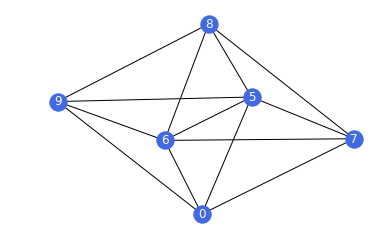

In [25]:
nx.draw_networkx(G, node_color='royalblue', font_color='w')
plt.axis('off')
plt.show()

In [55]:
def subgraph_colors(g, e, k=10):
    #select nodes
    x,y = e
    #list of K nodes
    Vk = [x,y]
    col = 1
    colors = [col,col]
    ngb_idx = 0
    while len(Vk)<k:
        
        #add neighbors
        nbg = list(nx.neighbors(g, Vk[ngb_idx]))
        col = colors[ngb_idx]+1
        colors.extend([col]*len(nbg))
        Vk.extend(nbg)
        ngb_idx += 1

    return Vk[:k], colors[:k]

In [56]:
Vk, colors = subgraph_colors(g, (0,9), k=5)

In [57]:
colors

[1, 1, 2, 2, 2]

In [58]:
Vk

[0, 9, 9, 5, 6]

In [59]:
# hash
position = 0

In [60]:
# sum Vk
np.ceil(np.sum([np.log(primesieve.nth_prime(x)) for x in colors]))

5.0

In [61]:
# colors of neighbors of x
ngb_x = list(nx.neighbors(g, Vk[position]))
ngb_x

[9, 5, 6, 7]

In [63]:
[Vk.index(x) for x in ngb_x if x in Vk]

[1, 3, 4]

In [64]:
[colors[Vk.index(x)] for x in ngb_x if x in Vk]

[1, 2, 2]

In [65]:
# sum colors neighbors of x
np.sum([np.log(primesieve.nth_prime(x)) for x in [colors[Vk.index(x)] for x in ngb_x if x in Vk]])

2.8903717578961645

In [71]:
def hashWL(x, Vk, colors, g):
    position = Vk.index(x)
    # sum Vk
    s_Vk = np.ceil(np.sum([np.log(primesieve.nth_prime(i)) for i in colors]))
    # sum neighbors colors
    ngb_x = list(nx.neighbors(g, Vk[position]))
    s_ngb_x = np.sum([np.log(primesieve.nth_prime(x)) for x in [colors[Vk.index(x)] for x in ngb_x if x in Vk]])
    return colors[position] + s_ngb_x/s_Vk

In [72]:
hashWL(0, Vk, colors, g)

1.5780743515792328

In [73]:
hashWL(9, Vk, colors, g)

1.5780743515792328

In [74]:
hashWL(6, Vk, colors, g)

2.4969813299576002

In [75]:
hashWL(5, Vk, colors, g)

2.4969813299576002

## Palette_WL

In [76]:
# distance v from (x,y)
e = (0,9)

In [77]:
def dist(v, e, g):
    sp_x = nx.shortest_path_length(g, v, e[0])
    sp_y = nx.shortest_path_length(g, v, e[1])
    return np.sqrt(sp_x * sp_y)

In [78]:
dist(5, e, g)

1.0

In [80]:
dist(7, e, g)

1.4142135623730951

In [81]:
dist(9, e, g)

0.0

In [84]:
def subgraph_colors(g, e, k=10):
    #select nodes
    x,y = e
    #list of K nodes
    Vk = [x,y]
    colors = []
    colors.append(dist(x, e, g))
    colors.append(dist(y, e, g))
    ngb_idx = 0
    while len(Vk)<k:
        #add neighbors
        nbg = list(nx.neighbors(g, Vk[ngb_idx]))
        colors.extend([dist(i, e, g) for i in nbg])
        Vk.extend(nbg)
        ngb_idx += 1
    return Vk[:k], colors[:k]

In [119]:
Vk, colors = subgraph_colors(g, (0,9), k=6)
Vk, colors

([0, 9, 9, 5, 6, 7], [0.0, 0.0, 0.0, 1.0, 1.0, 1.4142135623730951])

In [120]:
new_colors = [hashWL(v, Vk, colors, g) for v in Vk]
new_colors

[0.55451774444795621,
 0.41588830833596713,
 0.41588830833596713,
 1.5545177444479563,
 1.5545177444479563,
 1.8301018707090622]

In [109]:
# map real to colors
n_cols = len(np.unique(new_colors))
n_cols

4

In [121]:
def real_to_colors(colors):
    new_colors = colors.copy()
    n_cols = len(np.unique(new_colors))
    colors_list =[]
    for i in range(1,n_cols+1):
        min_col = np.min(new_colors)
        new_colors.pop(new_colors.index(min_col))
        colors_list.append(i)
        while min_col in new_colors:
            min_col = new_colors.pop(new_colors.index(min_col))
            colors_list.append(i)
    return colors_list

In [122]:
real_to_colors(new_colors)

[1, 1, 2, 3, 3, 4]

In [123]:
new_colors

[0.55451774444795621,
 0.41588830833596713,
 0.41588830833596713,
 1.5545177444479563,
 1.5545177444479563,
 1.8301018707090622]